***EN 2550 Assignment
 1***

*Name - Wanigarathna A.D.*

*Index No - 190660F*

1)

In [2]:
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

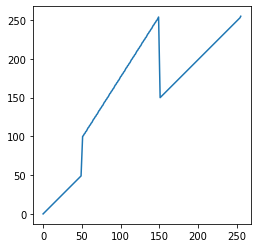

In [3]:
img = cv.imread(r'emma_gray.jpg', cv.IMREAD_GRAYSCALE) 
assert img is not None
t1 = np.linspace(0,49,50)
t2 = np.array([75])
t3 = np.linspace(100,254,99)
t4 = np.array([200])
t5 = np.linspace(150,255,105)

trans = np.concatenate((t1,t2,t3,t4,t5), axis = 0).astype(np.uint8)
assert len(trans) == 256
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(trans)

new_img = cv.LUT(img, trans)
img_plt = cv.cvtColor(img, cv.COLOR_BGR2RGB )
new_img_plt = cv.cvtColor(new_img, cv.COLOR_BGR2RGB )




Original Image,

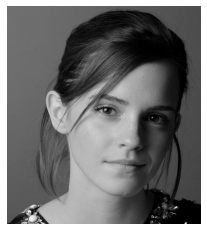

In [4]:
fig2,ax2 = plt.subplots()
plt.axis('off')
ax2.imshow(img_plt)


Transformed Image,

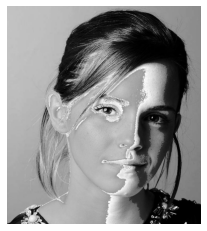

In [5]:
fig3,ax3 = plt.subplots()
plt.axis('off')
ax3.imshow(new_img_plt)

2)

a)

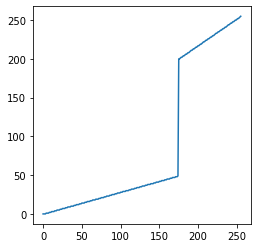

In [6]:
img = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE) 
assert img is not None
t1 = np.linspace(0,49,175)

t2 = np.linspace(200,255,81)


trans = np.concatenate((t1,t2), axis = 0).astype(np.uint8)
assert len(trans) == 256
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(trans)

new_img = cv.LUT(img, trans)
img_plt = cv.cvtColor(img, cv.COLOR_BGR2RGB )
new_img_plt = cv.cvtColor(new_img, cv.COLOR_BGR2RGB )


Original Image,

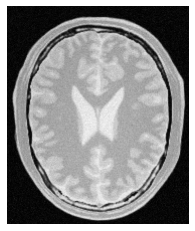

In [7]:
fig2,ax2 = plt.subplots()
plt.axis('off')
ax2.imshow(img_plt)


White matter enhanced image,

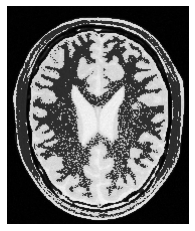

In [8]:
fig3,ax3 = plt.subplots()
plt.axis('off')
ax3.imshow(new_img_plt)

b)


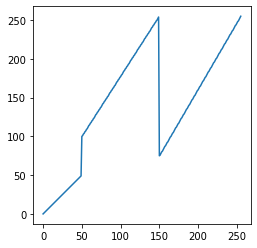

In [9]:
img = cv.imread(r'brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE) 
assert img is not None
t1 = np.linspace(0,49,50)
t2 = np.linspace(100,254,100)
t3 = np.linspace(75,255,106)

trans = np.concatenate((t1,t2,t3), axis = 0).astype(np.uint8)
assert len(trans) == 256
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.plot(trans)

new_img = cv.LUT(img, trans)
img_plt = cv.cvtColor(img, cv.COLOR_BGR2RGB )
new_img_plt = cv.cvtColor(new_img, cv.COLOR_BGR2RGB )


Original Image,

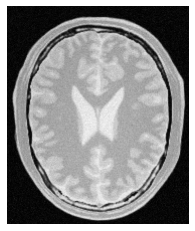

In [10]:
fig2,ax2 = plt.subplots()
plt.axis('off')
ax2.imshow(img_plt)


Gray enhanced image,

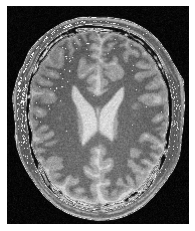

In [11]:
fig3,ax3 = plt.subplots()
plt.axis('off')
ax3.imshow(new_img_plt)

3)

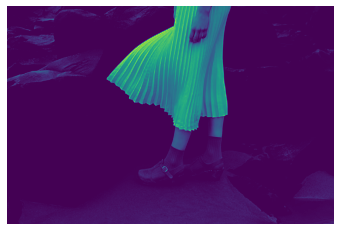

In [12]:
img = cv.imread(r'highlights_and_shadows.JPG') 
assert img is not None
img_lab = cv.cvtColor(img,cv.COLOR_BGR2LAB)
l,a,b = cv.split(img_lab)
gamma =  4
t = np.array([(p/255)**gamma*255 for p in range(256)]).astype(np.uint8)
lGamma = cv.LUT(l,t)
fig1,ax1 = plt.subplots()
plt.axis('off')

ax1.imshow(lGamma)

Upper figure depicts gamma correction to l plane with gamma = 4

Text(0.5, 1.0, 'Gamma corrected L plane of the original image')

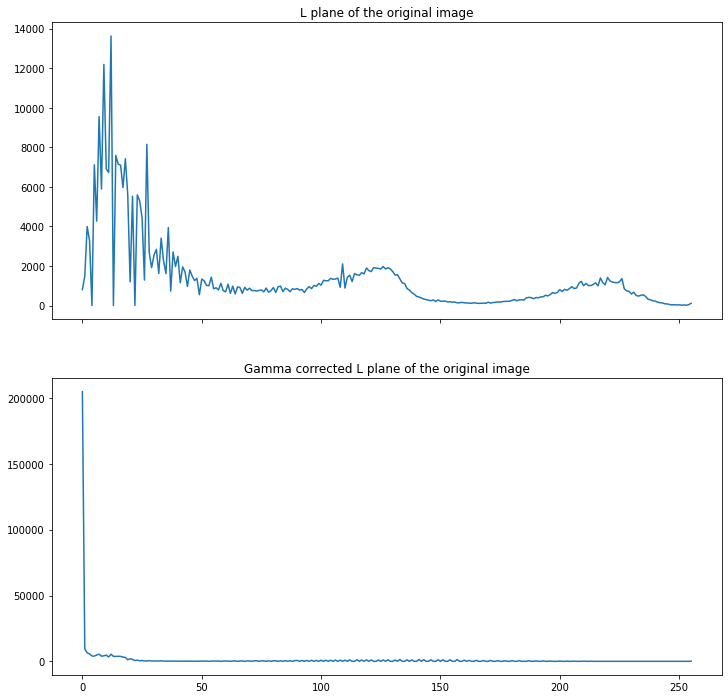

In [13]:
histL = cv.calcHist([l], [0], None, [256] , [0,256] )
histLGamma = cv.calcHist([lGamma], [0], None, [256] , [0,256] )

fig,ax = plt.subplots(2,1,sharex = True, figsize = (12,12) )
ax[0].plot(histL)
ax[0].set_title("L plane of the original image")
ax[1].plot(histLGamma)
ax[1].set_title("Gamma corrected L plane of the original image")

4)

(-0.5, 499.5, 499.5, -0.5)

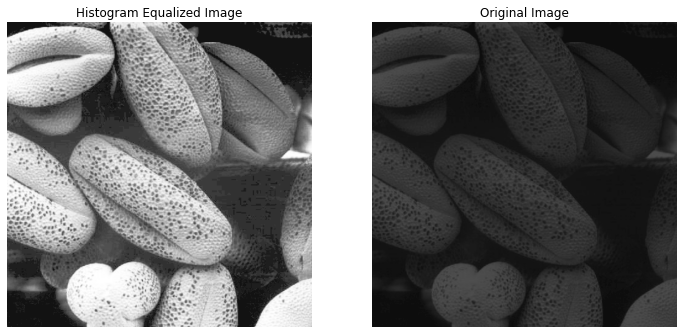

In [39]:
img = cv.imread(r'shells.png',cv.IMREAD_GRAYSCALE) 
assert img is not None

histr = cv.calcHist([img],[0],None,[256],[0,256])
CDF = (np.cumsum(histr)/img.size)
convertedValues = np.round([CDF*255]).astype(np.uint8)
imgHistogramEqualized = cv.LUT(img,convertedValues)
imgHistogramEqualized2 = cv.cvtColor(imgHistogramEqualized,cv.COLOR_BGR2RGB)

img2 = cv.cvtColor(img,cv.COLOR_BGR2RGB)

fig1,ax1 = plt.subplots(1,2, figsize = (12,12))

ax1[0].imshow(imgHistogramEqualized2)
ax1[0].set_title("Histogram Equalized Image")
ax1[0].axis("off")


ax1[1].imshow(img2)
ax1[1].set_title("Original Image")
ax1[1].axis("off")


Text(0.5, 1.0, 'Histogram of the histogram equalized image')

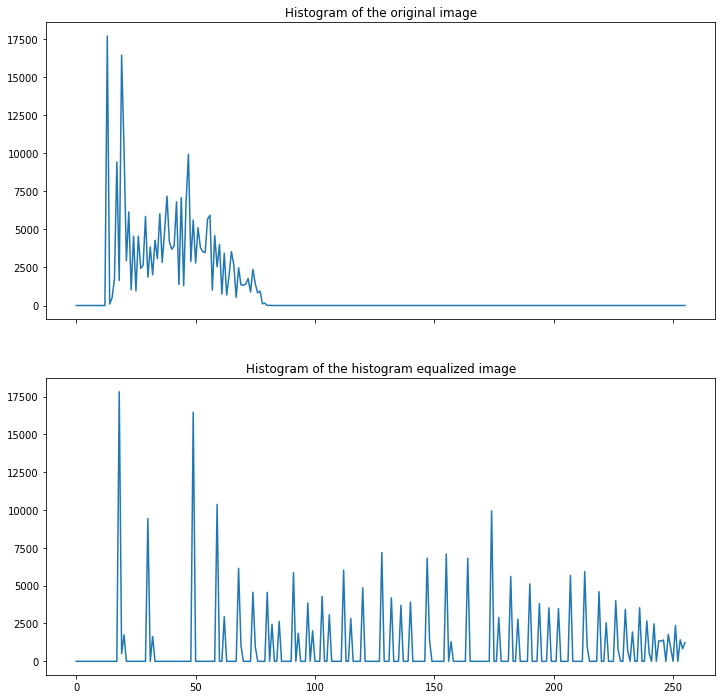

In [42]:
fig2,ax2 = plt.subplots(2,1, sharex= True, figsize = (12,12))

newHist = cv.calcHist([imgHistogramEqualized],[0],None,[256],[0,256])

ax2[0].plot(histr)
ax2[0].set_title("Histogram of the original image")
ax2[1].plot(newHist)
ax2[1].set_title("Histogram of the histogram equalized image")
